In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# Load Data
file_path = '/content/final_10k_dataset_cleaned.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset Loaded Successfully!")
    print(f"Shape: {df.shape}")
    # Calculate Word Count for later use
    df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
except FileNotFoundError:
    print(f"Error: {file_path} not found.")

Dataset Loaded Successfully!
Shape: (9996, 8)


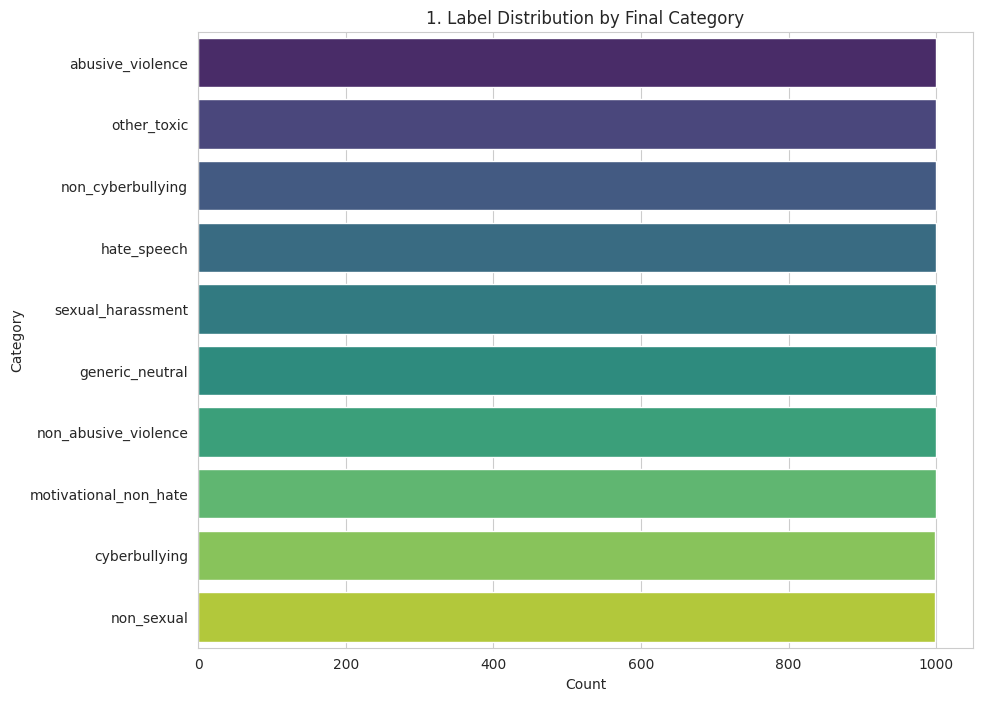

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(y='final_category', data=df, order=df['final_category'].value_counts().index, palette='viridis')
plt.title('1. Label Distribution by Final Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

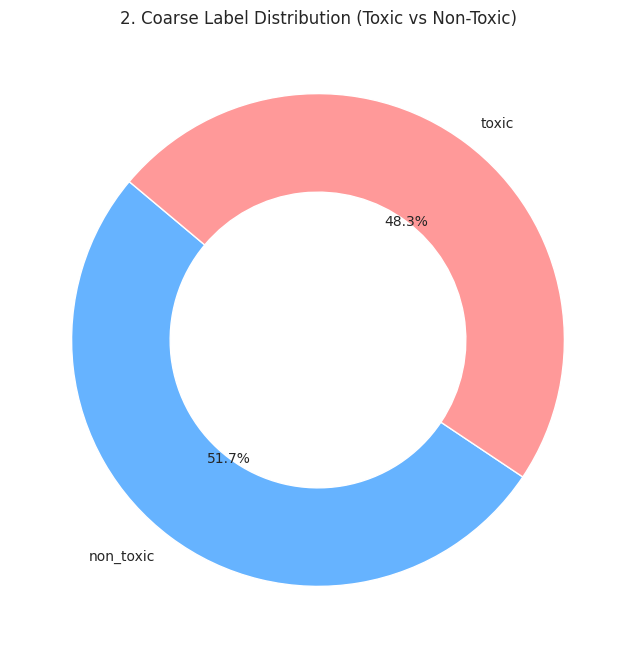

In [ ]:
plt.figure(figsize=(8, 8))
counts = df['coarse_label'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'], wedgeprops={'width': 0.4})
plt.title('2. Coarse Label Distribution (Toxic vs Non-Toxic)')
plt.show()

## 3. Dataset Source Contribution
**Chart Type:** Bar Chart

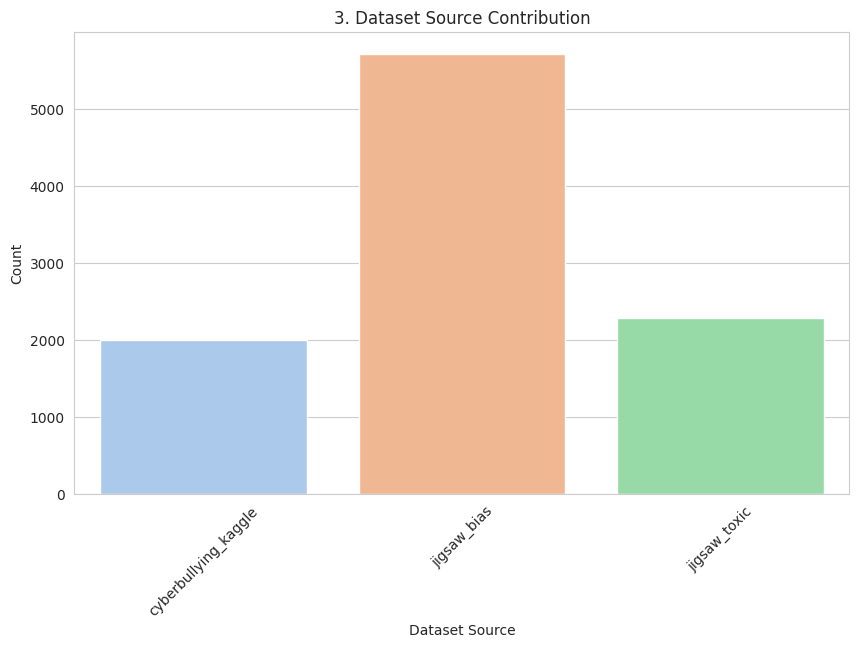

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='dataset_source', data=df, palette='pastel')
plt.title('3. Dataset Source Contribution')
plt.xlabel('Dataset Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 4. Label Source Composition (Human vs LLM)
**Chart Type:** Pie Chart

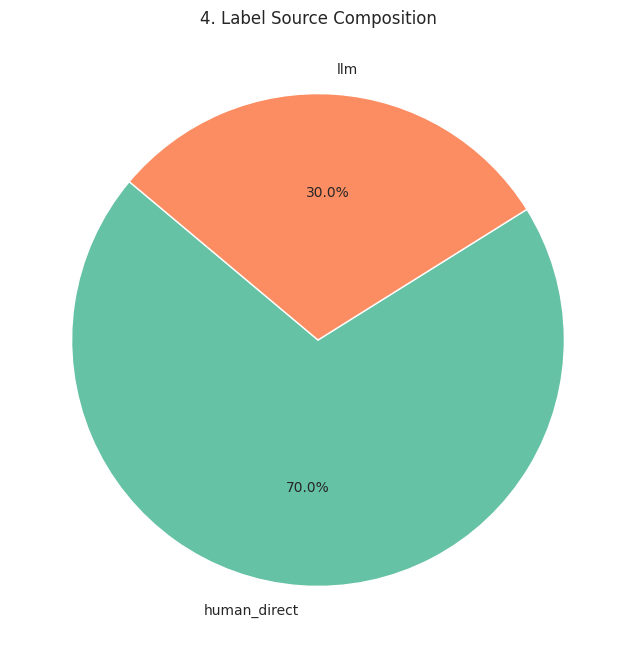

In [ ]:
plt.figure(figsize=(8, 8))
counts = df['label_source'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('4. Label Source Composition')
plt.show()

## 5. Word Count Distribution
**Chart Type:** Histogram

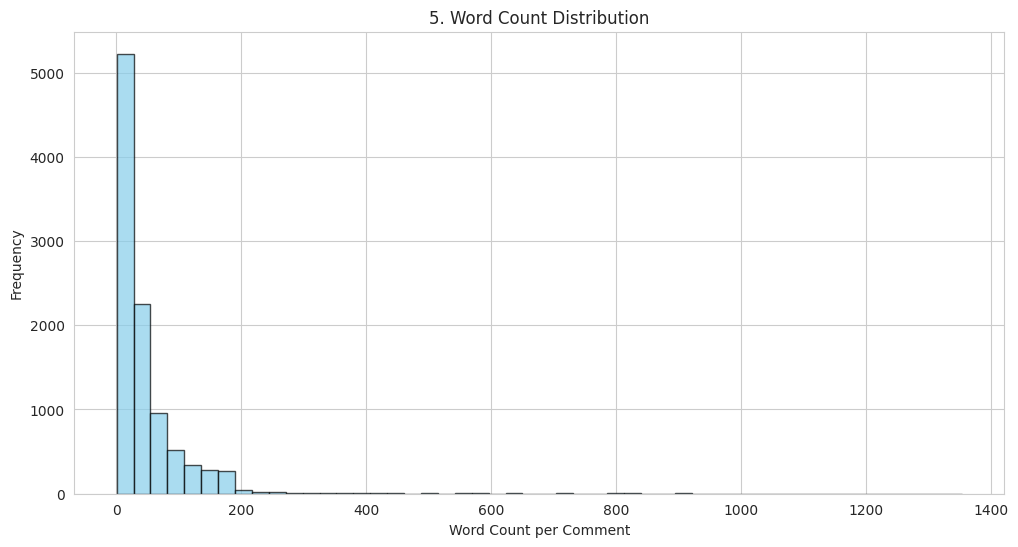

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['word_count'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('5. Word Count Distribution')
plt.xlabel('Word Count per Comment')
plt.ylabel('Frequency')
plt.show()

## 6. Most Frequent Words by Category
**Chart Type:** Word Cloud Grid (Showing top 4 toxic categories)

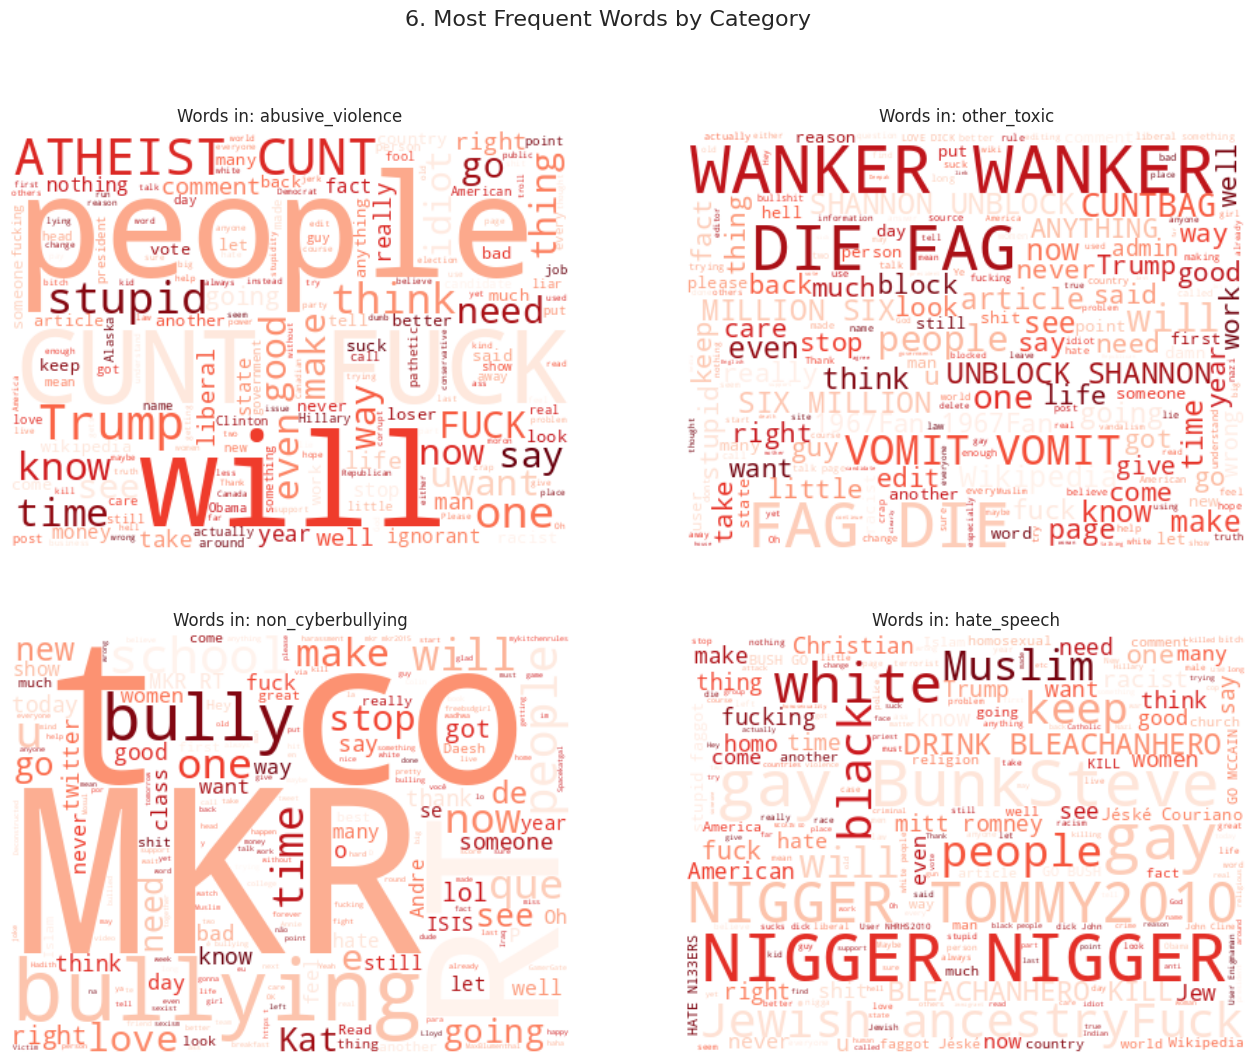

In [ ]:
top_cats = df['final_category'].value_counts().index.tolist()
if 'normal' in top_cats:
    top_cats.remove('normal')
selected_cats = top_cats[:4]

plt.figure(figsize=(16, 12))
for i, cat in enumerate(selected_cats, 1):
    plt.subplot(2, 2, i)
    text = " ".join(df[df['final_category'] == cat]['text'].astype(str))
    if text:
        wc = WordCloud(width=400, height=300, background_color='white', colormap='Reds').generate(text)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Words in: {cat}')
plt.suptitle('6. Most Frequent Words by Category', fontsize=16)
plt.show()

## 7. Co-occurrence Heatmap of Human vs LLM Categories
**Chart Type:** Heatmap

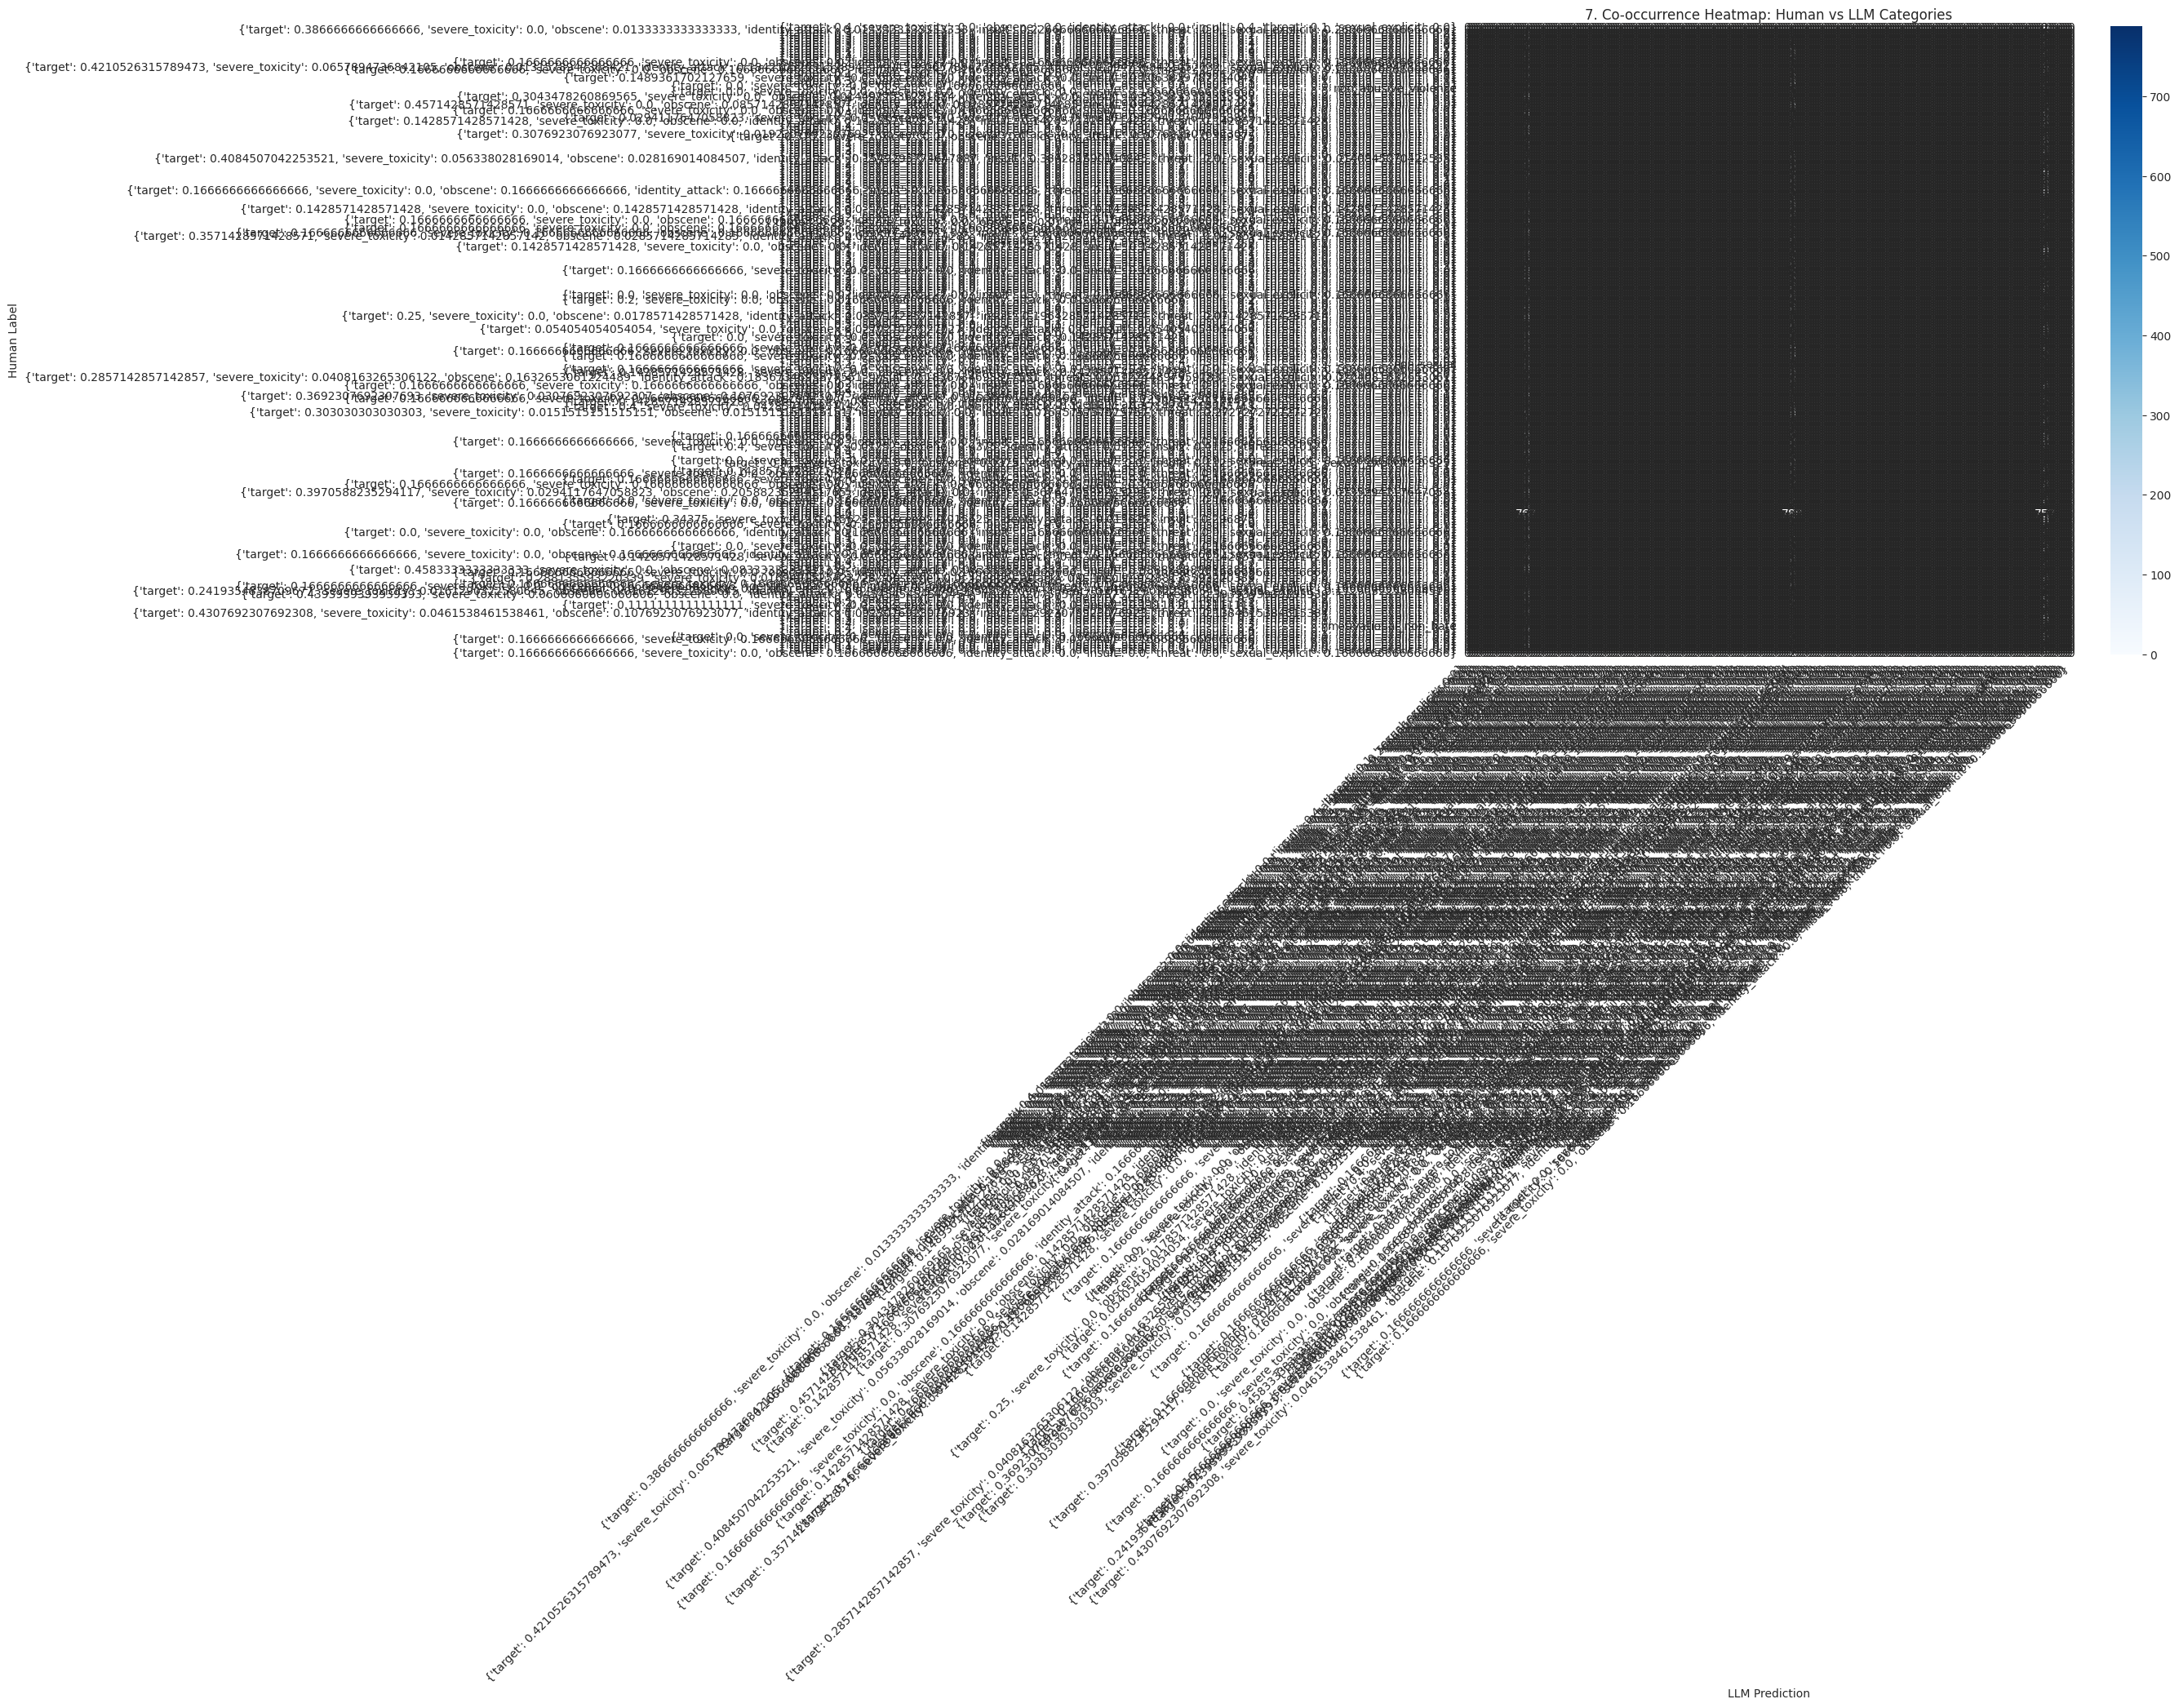

In [ ]:
from sklearn.metrics import confusion_matrix

valid_data = df.dropna(subset=['human_label_original', 'llm_pred_category'])
labels = list(set(valid_data['human_label_original'].unique()) | set(valid_data['llm_pred_category'].unique()))

cm = confusion_matrix(valid_data['human_label_original'], valid_data['llm_pred_category'], labels=labels)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('7. Co-occurrence Heatmap: Human vs LLM Categories')
plt.xlabel('LLM Prediction')
plt.ylabel('Human Label')
plt.xticks(rotation=45, ha='right')
plt.show()

## 8. Label Count by Dataset Source and Category
**Chart Type:** Clustered Bar Chart

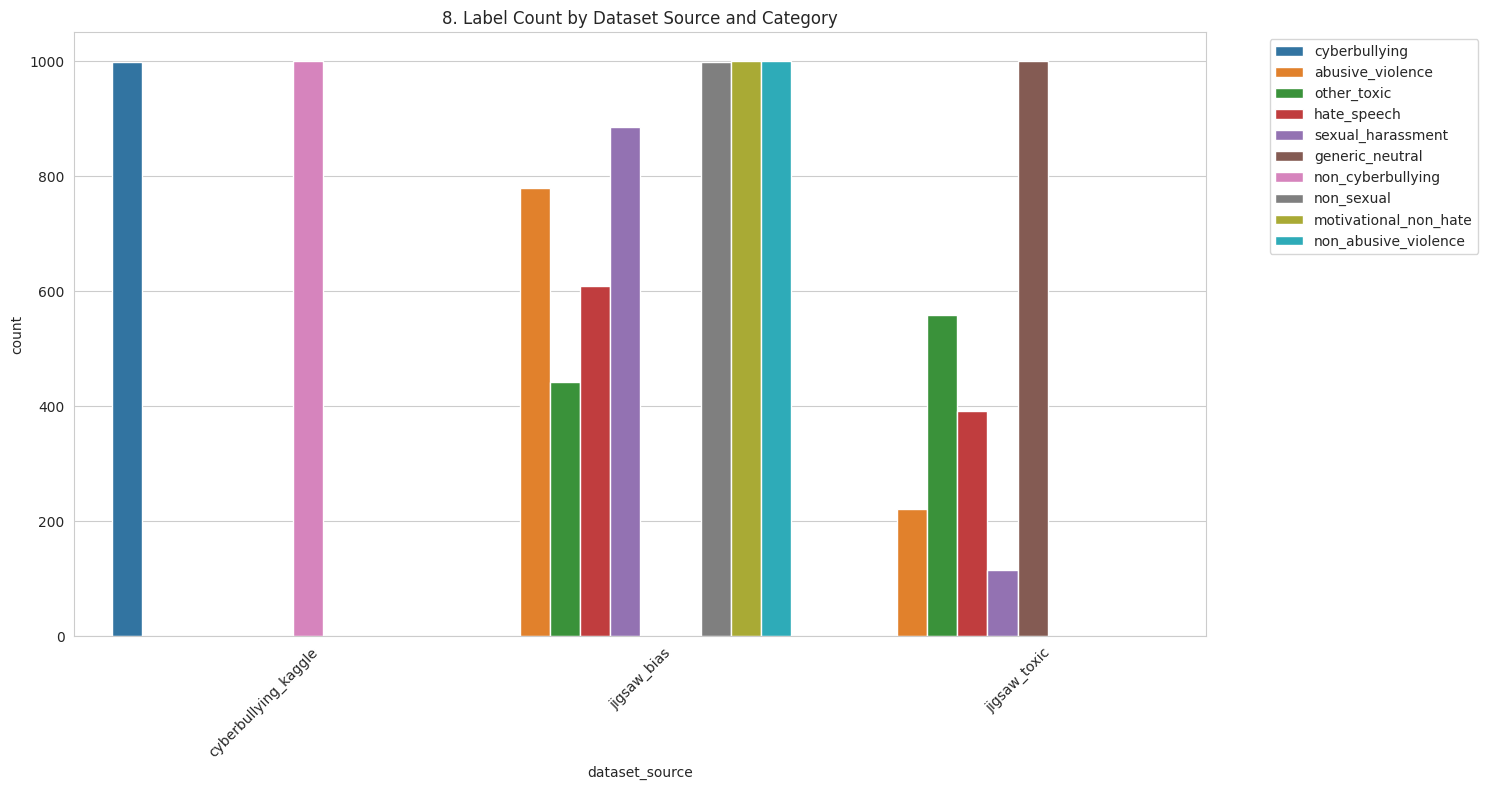

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='dataset_source', hue='final_category', data=df, palette='tab10')
plt.title('8. Label Count by Dataset Source and Category')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 9. Token Length Distribution



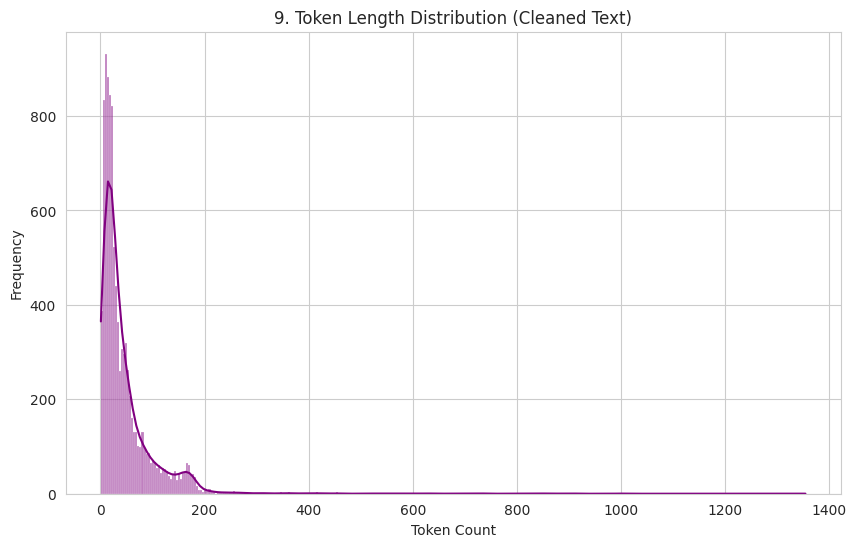

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], color='purple', kde=True)
plt.title('9. Token Length Distribution (Cleaned Text)')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.show()

## 10. Model Performance Across Experiments


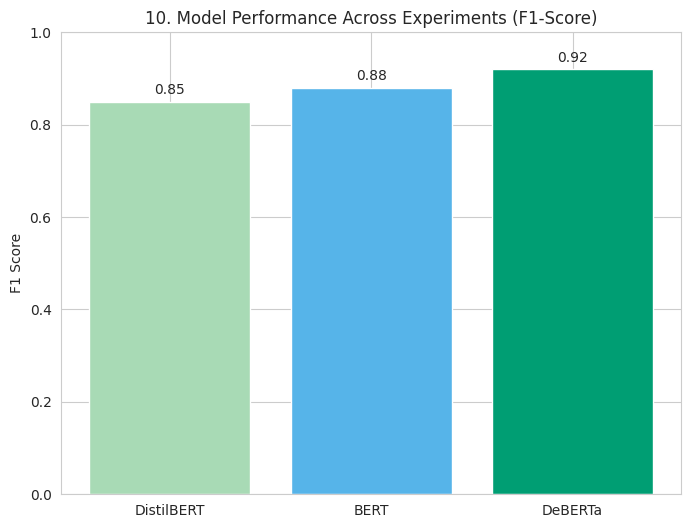

In [ ]:
# Placeholder scores - PLEASE UPDATE THESE WITH YOUR ACTUAL RESULTS
model_scores = {
    'DistilBERT': 0.85,
    'BERT': 0.88,
    'DeBERTa': 0.92
}

plt.figure(figsize=(8, 6))
bars = plt.bar(model_scores.keys(), model_scores.values(), color=['#a8dab5', '#56b4e9', '#009e73'])
plt.title('10. Model Performance Across Experiments (F1-Score)')
plt.ylabel('F1 Score')
plt.ylim(0, 1.0)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()

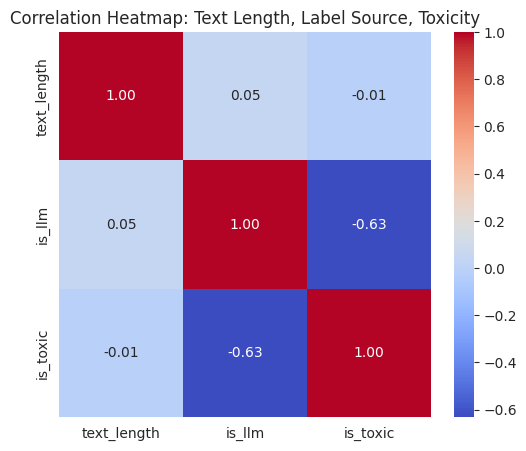

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
df['is_llm'] = df['label_source'].apply(lambda x: 1 if 'llm' in x.lower() else 0)
df['is_toxic'] = df['coarse_label'].apply(lambda x: 1 if x.lower() == 'toxic' else 0)

corr = df[['text_length', 'is_llm', 'is_toxic']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Text Length, Label Source, Toxicity")
plt.show()


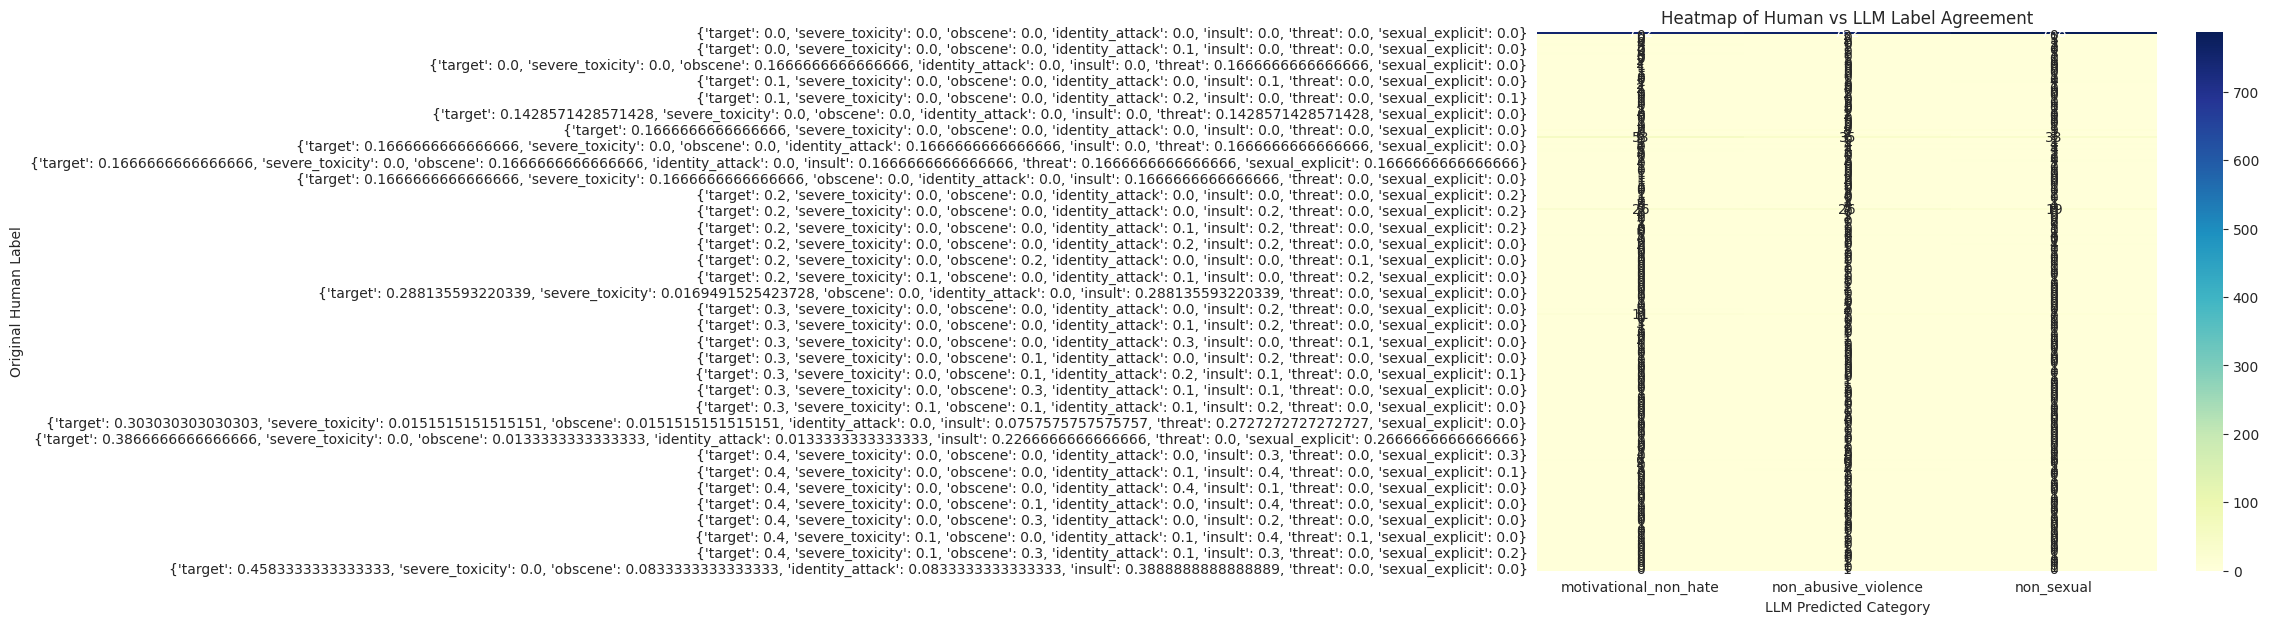

In [ ]:
import numpy as np

cross_tab = pd.crosstab(df['human_label_original'], df['llm_pred_category']).fillna(0)

plt.figure(figsize=(10,7))
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title("Heatmap of Human vs LLM Label Agreement")
plt.xlabel("LLM Predicted Category")
plt.ylabel("Original Human Label")
plt.show()


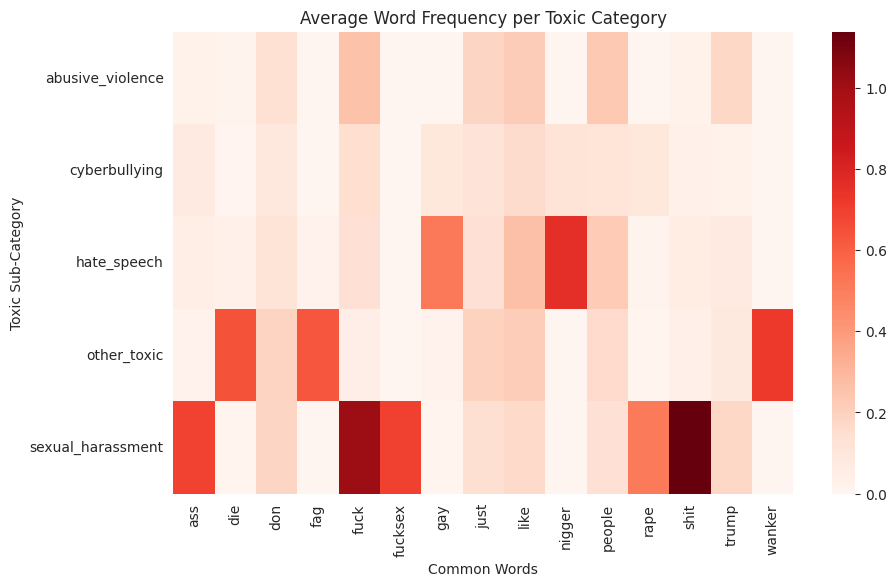

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

subset = df[df['coarse_label'] == 'toxic']
vectorizer = CountVectorizer(max_features=15, stop_words='english')
X = vectorizer.fit_transform(subset['text'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq['final_category'] = subset['final_category'].values

heat_data = word_freq.groupby('final_category').mean()
plt.figure(figsize=(10,6))
sns.heatmap(heat_data, cmap='Reds')
plt.title("Average Word Frequency per Toxic Category")
plt.xlabel("Common Words")
plt.ylabel("Toxic Sub-Category")
plt.show()


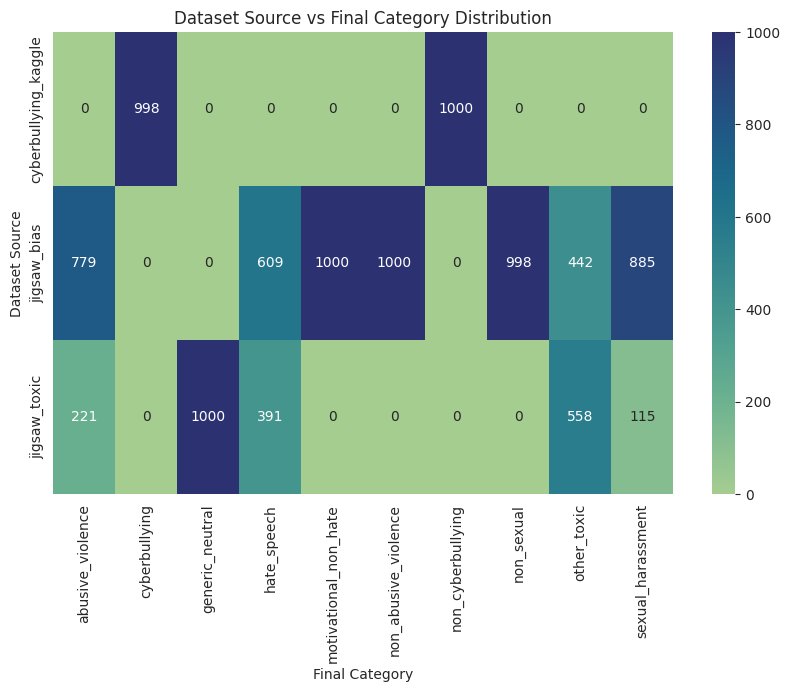

In [ ]:
co_occurrence = pd.crosstab(df['dataset_source'], df['final_category'])
plt.figure(figsize=(10,6))
sns.heatmap(co_occurrence, cmap='crest', annot=True, fmt='d')
plt.title("Dataset Source vs Final Category Distribution")
plt.xlabel("Final Category")
plt.ylabel("Dataset Source")
plt.show()


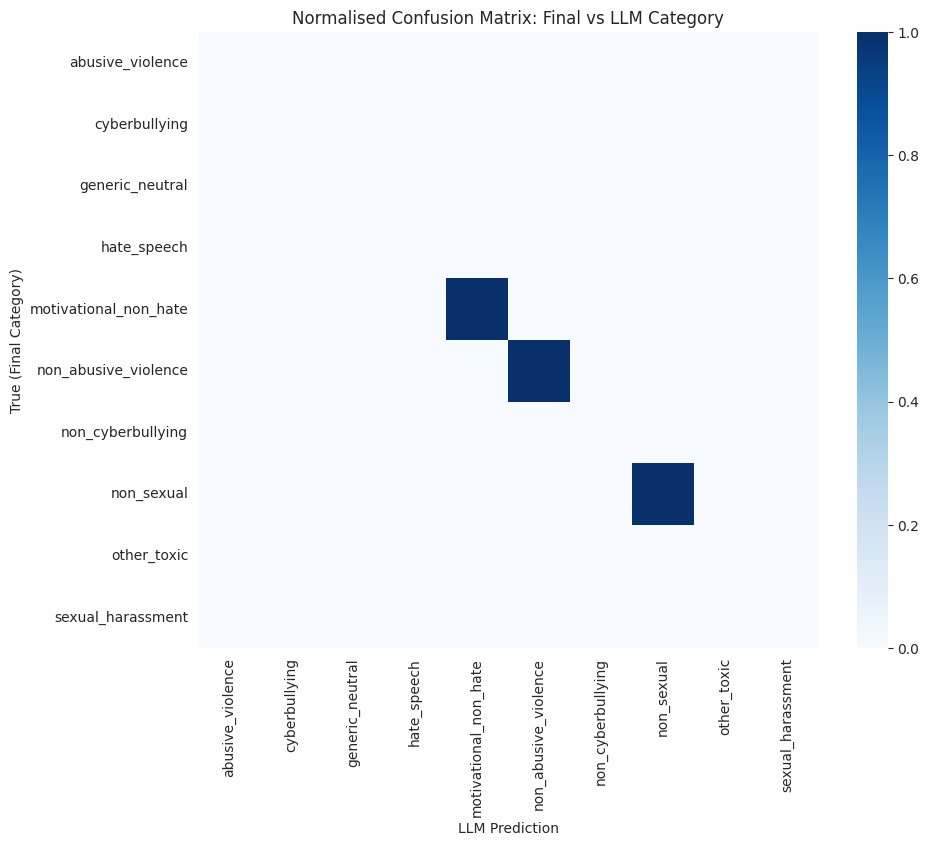

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

valid = df.dropna(subset=['llm_pred_category'])
labels = sorted(df['final_category'].unique())

cm = confusion_matrix(valid['final_category'], valid['llm_pred_category'], labels=labels, normalize='true')

plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Normalised Confusion Matrix: Final vs LLM Category")
plt.xlabel("LLM Prediction")
plt.ylabel("True (Final Category)")
plt.show()


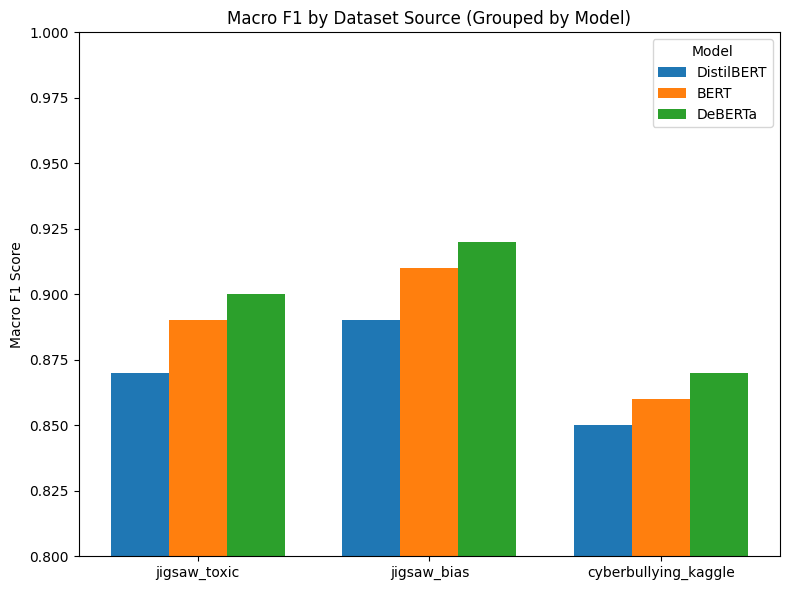

In [2]:

import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Dataset Source": ["jigsaw_toxic", "jigsaw_toxic", "jigsaw_toxic",
                       "jigsaw_bias", "jigsaw_bias", "jigsaw_bias",
                       "cyberbullying_kaggle", "cyberbullying_kaggle", "cyberbullying_kaggle"],
    "Model": ["DistilBERT", "BERT", "DeBERTa",
              "DistilBERT", "BERT", "DeBERTa",
              "DistilBERT", "BERT", "DeBERTa"],
    "Macro F1": [0.87, 0.89, 0.90,
                 0.89, 0.91, 0.92,
                 0.85, 0.86, 0.87]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.25
x = range(3)

for i, model in enumerate(df["Model"].unique()):
    subset = df[df["Model"] == model]
    ax.bar([p + i * bar_width for p in x], subset["Macro F1"],
           width=bar_width, label=model)

ax.set_xticks([p + bar_width for p in x])
ax.set_xticklabels(["jigsaw_toxic", "jigsaw_bias", "cyberbullying_kaggle"])
ax.set_ylim(0.8, 1.0)
ax.set_ylabel("Macro F1 Score")
ax.set_title("Macro F1 by Dataset Source (Grouped by Model)")
ax.legend(title="Model")
plt.tight_layout()

plt.show()


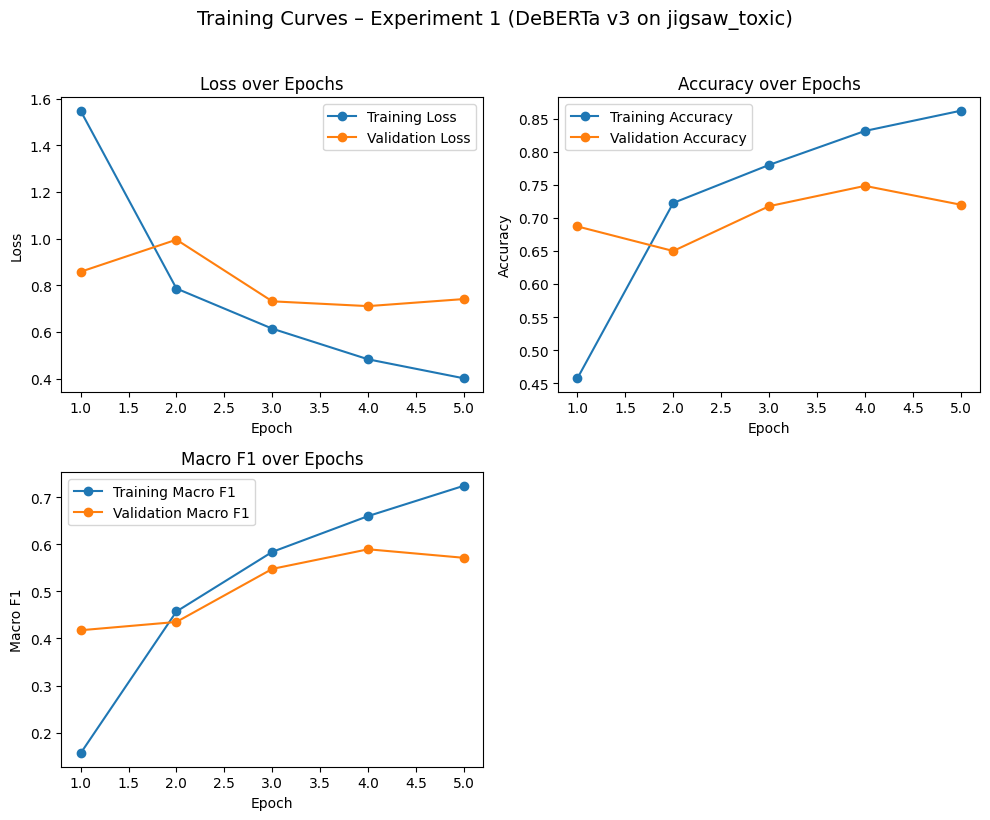

In [8]:

import matplotlib.pyplot as plt


epochs = [1, 2, 3, 4, 5]
train_loss = [1.5483, 0.7861, 0.6140, 0.4826, 0.4011]
val_loss   = [0.8579, 0.9955, 0.7312, 0.7107, 0.7410]
train_acc  = [0.4573, 0.7226, 0.7801, 0.8315, 0.8621]
val_acc    = [0.6871, 0.6499, 0.7177, 0.7484, 0.7199]
train_f1   = [0.1563, 0.4573, 0.5838, 0.6598, 0.7242]
val_f1     = [0.4175, 0.4351, 0.5477, 0.5893, 0.5712]


fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Training Curves – Experiment 1 (DeBERTa v3 on jigsaw_toxic)", fontsize=14, y=1.02)

axes[0, 0].plot(epochs, train_loss, marker='o', label='Training Loss')
axes[0, 0].plot(epochs, val_loss, marker='o', label='Validation Loss')
axes[0, 0].set_title("Loss over Epochs")
axes[0, 0].set_xlabel("Epoch")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].legend()

axes[0, 1].plot(epochs, train_acc, marker='o', label='Training Accuracy')
axes[0, 1].plot(epochs, val_acc, marker='o', label='Validation Accuracy')
axes[0, 1].set_title("Accuracy over Epochs")
axes[0, 1].set_xlabel("Epoch")
axes[0, 1].set_ylabel("Accuracy")
axes[0, 1].legend()

axes[1, 0].plot(epochs, train_f1, marker='o', label='Training Macro F1')
axes[1, 0].plot(epochs, val_f1, marker='o', label='Validation Macro F1')
axes[1, 0].set_title("Macro F1 over Epochs")
axes[1, 0].set_xlabel("Epoch")
axes[1, 0].set_ylabel("Macro F1")
axes[1, 0].legend()


axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


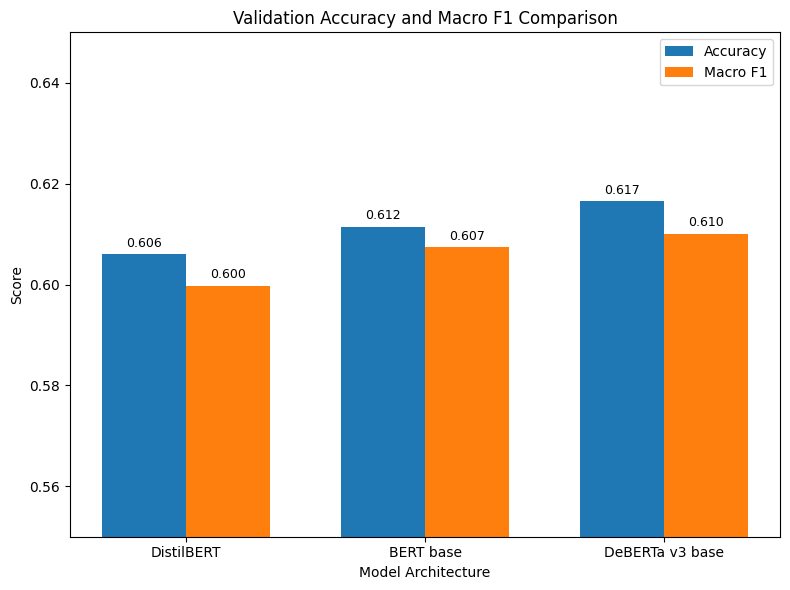

In [10]:


import matplotlib.pyplot as plt
import numpy as np


models = ["DistilBERT", "BERT base", "DeBERTa v3 base"]
accuracy = [0.6060, 0.6115, 0.6165]
macro_f1 = [0.5998, 0.6074, 0.6101]

x = np.arange(len(models))
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
bars2 = ax.bar(x + width/2, macro_f1, width, label='Macro F1')

ax.set_xlabel("Model Architecture")
ax.set_ylabel("Score")
ax.set_title("Validation Accuracy and Macro F1 Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0.55, 0.65)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


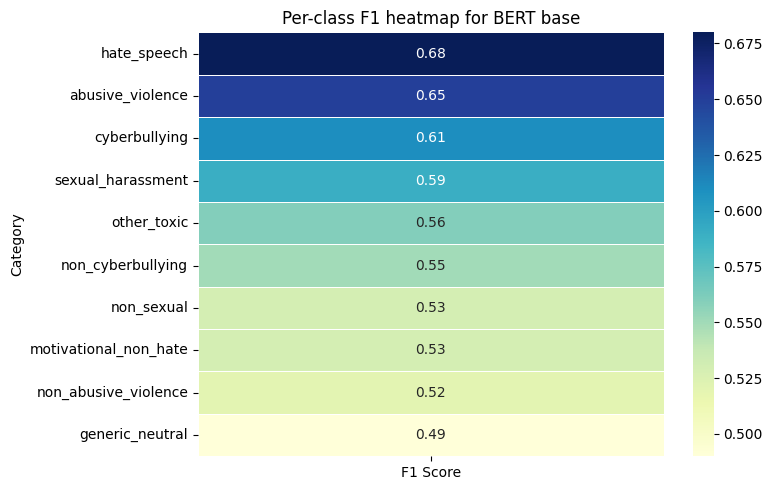

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


f1_scores = {
    "abusive_violence": 0.65,
    "cyberbullying": 0.61,
    "hate_speech": 0.68,
    "sexual_harassment": 0.59,
    "other_toxic": 0.56,
    "non_sexual": 0.53,
    "non_cyberbullying": 0.55,
    "motivational_non_hate": 0.53,
    "non_abusive_violence": 0.52,
    "generic_neutral": 0.49,
}

df_f1 = pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1 Score']).sort_values(by='F1 Score', ascending=False)

plt.figure(figsize=(8, 5))
sns.heatmap(df_f1, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Per-class F1 heatmap for BERT base", fontsize=12)
plt.xlabel("")
plt.ylabel("Category")
plt.tight_layout()
plt.show()
